In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew
from scipy.stats import norm,kurtosis
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
da=xr.open_dataset("/vftmp/Olivia.Mcredmond/data/model_timeseries_odiv2.nc",decode_times=True)
ds=xr.open_dataset("/vftmp/Olivia.Mcredmond/data/model_timeseries_odiv181.nc",decode_times=True)
odiv181_pressure= xr.open_dataset("/work4/k2t/sealevel/data/model_timeseries_psl_odiv181.nc")
odiv2_pressure= xr.open_dataset("/work4/k2t/sealevel/data/model_timeseries_psl_odiv2.nc")
obs_sandyhook= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/SandyHook(1958-2017).cdf",decode_times=True)
obs_seattle= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/Seattle(1958-2017).cdf",decode_times=True)
obs_wellington= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/Wellington(1958-2017).cdf",decode_times=True)
obs_hiroshima= xr.open_dataset("/vftmp/Olivia.Mcredmond/data/cdf files/hiroshima.cdf",decode_times=True)

In [4]:
seattle_2= da.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
seattle_2=seattle_2-seattle_2.mean()
sandyhook_2= da.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
sandyhook_2=sandyhook_2-sandyhook_2.mean()
wellington_2= da.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
wellington_2=wellington_2-wellington_2.mean()

In [5]:
seattle_181= ds.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
seattle_181=seattle_181-seattle_181.mean()
sandyhook_181= ds.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
sandyhook_181=sandyhook_181-sandyhook_181.mean()
wellington_181= ds.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
wellington_181=wellington_181-wellington_181.mean()

In [6]:
psl2_seattle = (odiv2_pressure.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31")))/10000
psl2_seattle = psl2_seattle-psl2_seattle.mean()
psl181_seattle=(odiv181_pressure.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31")))/10000
psl181_seattle = psl181_seattle-seattle_181.mean()

psl2_sandyhook = (odiv2_pressure.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31")))/10000
psl2_sandyhook = psl2_sandyhook-psl2_sandyhook.mean()
psl181_sandyhook = (odiv181_pressure.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31")))/10000
psl181_sandyhook = psl181_sandyhook-psl181_sandyhook.mean()

psl2_wellington = (odiv2_pressure.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31")))/10000
psl2_wellington = psl2_wellington-psl2_wellington.mean()
psl181_wellington = (odiv181_pressure.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31")))/10000
psl181_wellington = psl181_wellington-psl181_wellington.mean()

## display random

In [38]:
da.SEATTLE

<xarray.DataArray 'SEATTLE' (time: 34675)> Size: 139kB
array([0.251059, 0.272631, 0.263291, ..., 0.311624, 0.299079, 0.279689],
      dtype=float32)
Coordinates:
  * time     (time) object 277kB 1920-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes: (12/17)
    long_name:      Sea surface height above geoid
    units:          m
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_height_above_geoid
    ...             ...
    distance:       3.0342807359212074
    mod_index:      734994
    model_coords:   [  47.59102 -122.375  ]
    dim_vals:       [  47.59101717 -122.74175769]
    real_coords:    [  47.602 -122.338]
    dims:           ['yh', 'xh']

In [42]:
odiv2_pressure.SEATTLE

<xarray.DataArray 'SEATTLE' (time: 34675)> Size: 139kB
array([      nan,       nan,       nan, ...,  99336.08, 100398.31,
       100003.3 ], dtype=float32)
Coordinates:
  * time     (time) object 277kB 1920-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes: (12/18)
    long_name:      Sea Level Pressure
    units:          Pa
    cell_methods:   time: mean
    cell_measures:  area: area
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  air_pressure_at_sea_level
    ...             ...
    distance:       36.59206161924981
    mod_index:      39646
    model_coords:   [ 47.5   238.125]
    dim_vals:       [ 47.5   238.125]
    real_coords:    [  47.602 -122.338]
    dims:           ['lat', 'lon']

In [43]:
da.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))

<xarray.DataArray 'WELLINGTON_HARBOUR' (time: 20805)> Size: 83kB
array([0.084999, 0.072487, 0.076833, ..., 0.101021, 0.102935, 0.111584],
      dtype=float32)
Coordinates:
  * time     (time) object 166kB 1958-01-01 12:00:00 ... 2014-12-31 12:00:00
Attributes: (12/17)
    long_name:      Sea surface height above geoid
    units:          m
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_height_above_geoid
    ...             ...
    distance:       15.253387226145136
    mod_index:      324324
    model_coords:   [ -41.35629 -185.375  ]
    dim_vals:       [ -41.35628716 -186.09487076]
    real_coords:    [-41.284 174.78 ]
    dims:           ['yh', 'xh']

In [44]:
psl181_seattle

<xarray.DataArray 'SEATTLE' (time: 20819)> Size: 83kB
array([10.176224, 10.153392, 10.255704, ..., 10.256599, 10.422069,
       10.405972], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 167kB 1958-01-01 1958-01-02 ... 2014-12-31

## Pressure Histogram

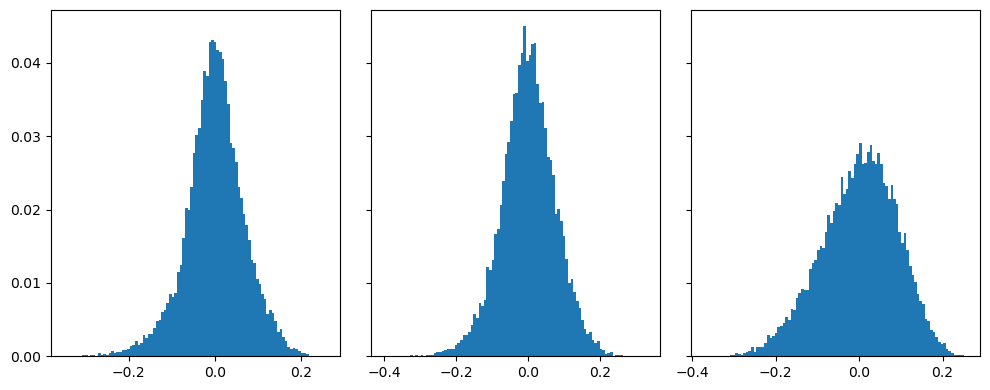

In [7]:
#1958 to 2019
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))
axs[0].hist(psl181_seattle, bins=100, weights=1/len(psl181_seattle) * np.ones(len(psl181_seattle)))
axs[1].hist(psl181_sandyhook, bins=100, weights=1/len(psl181_sandyhook) * np.ones(len(psl181_sandyhook)))
axs[2].hist(psl181_wellington, bins=100, weights=1/len(psl181_wellington) * np.ones(len(psl181_wellington)))
plt.show()
# divide by 10000 because 100 pascal is 1 mbar and 1 mbar raises sea level by about 1 cm and 100 cm is 1 meter

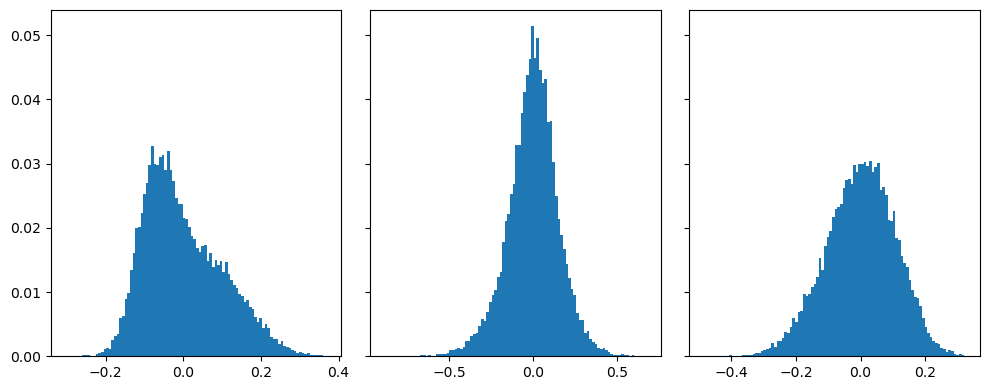

In [36]:
#1958 to 2014
seattle=ds.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl181_seattle)
sandyhook =ds.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl181_sandyhook)
wellington =ds.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl181_wellington)

fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))
axs[0].hist(seattle-seattle.mean(), bins=100, weights=1/len(seattle) * np.ones(len(seattle)))
axs[1].hist(sandyhook-sandyhook.mean(), bins=100, weights=1/len(sandyhook) * np.ones(len(sandyhook)))
axs[2].hist(wellington-wellington.mean(), bins=100, weights=1/len(wellington) * np.ones(len(wellington)))
plt.show()
#mean subtracted after pressure included

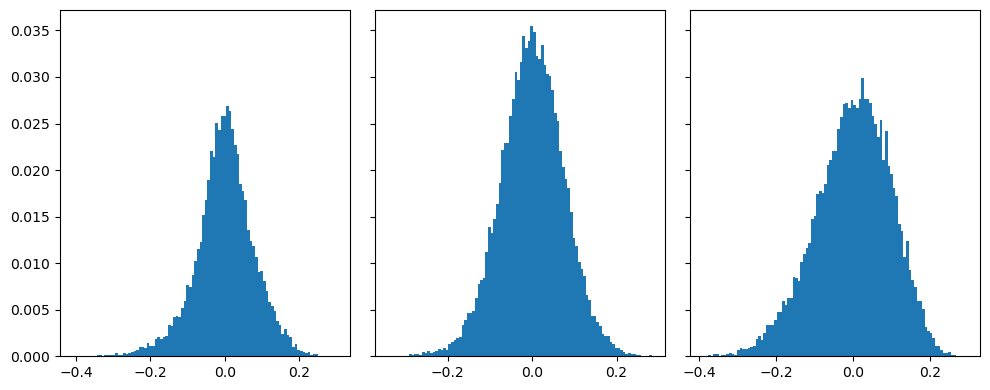

In [10]:
#1920 to 2014
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))
axs[0].hist(psl2_seattle, bins=100, weights=1/len(odiv2_pressure.SEATTLE) * np.ones(len(psl2_seattle)))
axs[1].hist(psl2_sandyhook, bins=100, weights=1/len(psl2_sandyhook) * np.ones(len(psl2_sandyhook)))
axs[2].hist(psl2_wellington, bins=100, weights=1/len(psl2_wellington) * np.ones(len(psl2_wellington)))
plt.show()

In [ ]:
#odiv2_pressure.SEATTLE['time']=odiv2_pressure.SEATTLE.time.convert_calendar(calendar='standard', dim='time', align_on=None, missing=None, use_cftime=False)
#datetime.strptime("2017-12-31", '%Y-%m-%d').date()
#t1 = (odiv2_pressure.SEATTLE['time']<= (cftime.date2index("2017-12-31")))
psl_2=odiv2_pressure.SEATTLE.loc[t1]
seattle=ds.SEATTLE+np.array(psl_2/10000)

t1 = (pd.to_datetime(odiv2_pressure.SANDY_HOOK['time']) <= pd.to_datetime("2017-12-31"))
psl_2=odiv2_pressure.SANDY_HOOK.loc[t1]
sandyhook =ds.SANDY_HOOK+np.array(psl_2/10000)

t1 = (odiv2_pressure.WELLINGTON_HARBOUR['time'] <= pd.to_datetime('2017-12-31'))
psl_2=odiv2_pressure.WELLINGTON_HARBOUR.loc[t1]
wellington =ds.WELLINGTON_HARBOUR+np.array(psl_2/10000)

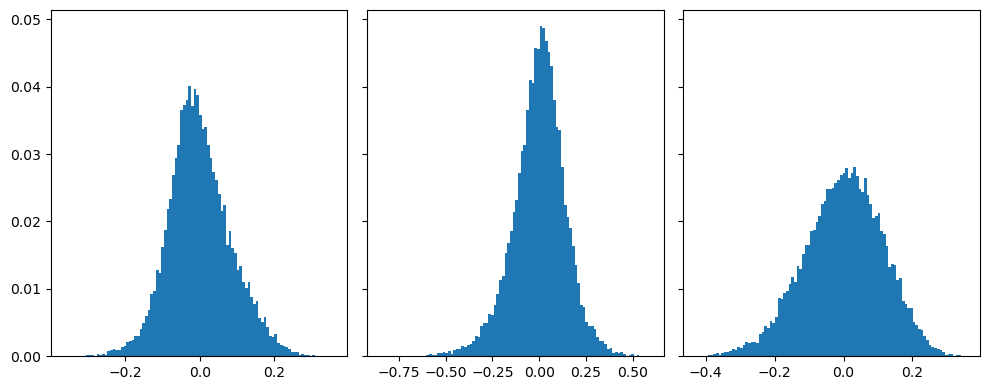

In [18]:
#1958 to 2014
seattle=da.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl2_seattle)
sandyhook =da.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl2_sandyhook)
wellington =da.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl2_wellington)

fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))
axs[0].hist(seattle-seattle.mean(), bins=100, weights=1/len(seattle) * np.ones(len(seattle)))
axs[1].hist(sandyhook-sandyhook.mean(), bins=100, weights=1/len(sandyhook) * np.ones(len(sandyhook)))
axs[2].hist(wellington-wellington.mean(), bins=100, weights=1/len(wellington) * np.ones(len(wellington)))

plt.show()

## Northwest Coast Distribution Plots

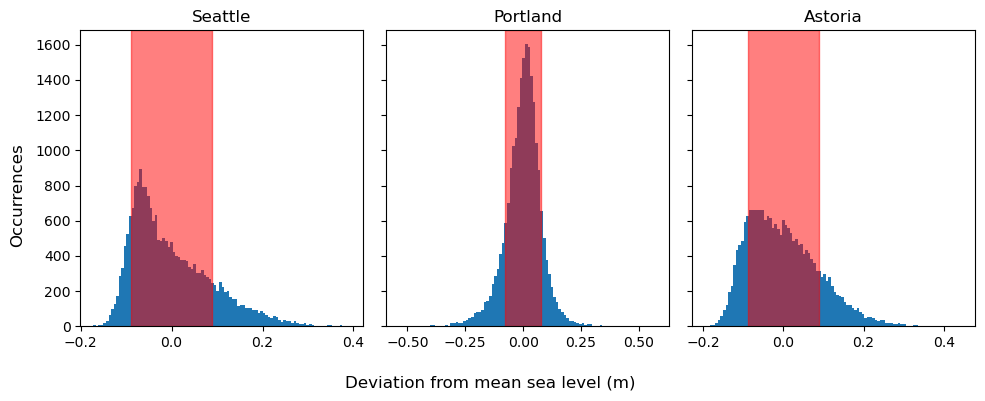

In [10]:

fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))

#create histogram of variance around mean sea level
axs[0].hist(ds.SEATTLE-ds.SEATTLE.mean(), bins=100)
axs[1].hist(ds.PORTLAND-ds.PORTLAND.mean(), bins=100) #this is actually portland,maine
axs[2].hist(ds.ASTORIA-ds.ASTORIA.mean(), bins=100)

#show stdev
axs[0].axvspan(-1*ds.SEATTLE.std(),ds.SEATTLE.std(), alpha=0.5, color='red')
axs[1].axvspan(-1*ds.PORTLAND.std(),ds.PORTLAND.std(), alpha=0.5, color='red')
axs[2].axvspan(-1*ds.ASTORIA.std(),ds.ASTORIA.std(), alpha=0.5, color='red')

axs[0].set_title('Seattle')
axs[1].set_title('Portland')
axs[2].set_title('Astoria')

fig.supxlabel("Deviation from mean sea level (m)")
fig.supylabel("Occurrences")

plt.show()

#Find more places in the pacific northwest using load_n_closest
#Is it skewed being of the rainshadow effect and large amounts of rainfall in the area?
#Lajolla further south recieves little rain and has a skew in the oposite direction

## Sydney Region Plots

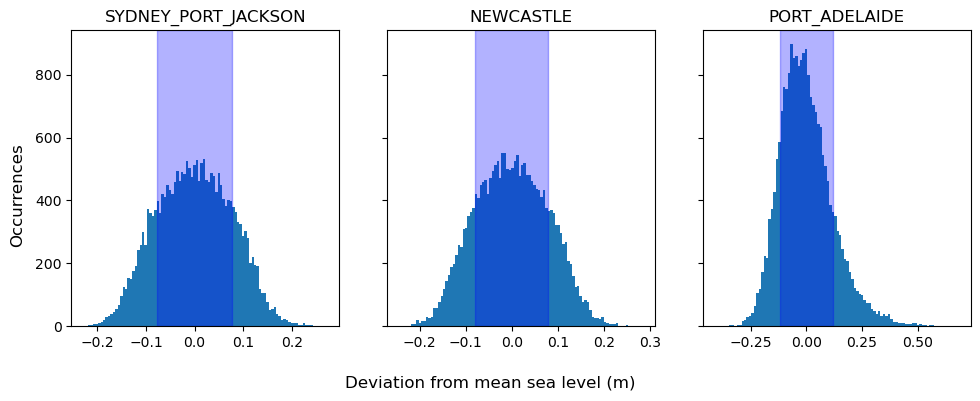

In [4]:
fig, axs = plt.subplots(1,3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))
fig.subplots_adjust( left=None, bottom=None,  right=None, top=None, wspace=10, hspace=None)

axs[0].hist(ds.SYDNEY_PORT_JACKSON-ds.SYDNEY_PORT_JACKSON.mean(), bins=100)
axs[1].hist(ds.NEWCASTLE_I-ds.NEWCASTLE_I.mean(), bins=100)
axs[2].hist(ds.PORT_ADELAIDE-ds.PORT_ADELAIDE.mean(), bins=100)

axs[0].axvspan(-1*ds.SYDNEY_PORT_JACKSON.std(),ds.SYDNEY_PORT_JACKSON.std(), alpha=0.3, color='blue')
axs[1].axvspan(-1*ds.NEWCASTLE_I.std(),ds.NEWCASTLE_I.std(), alpha=0.3, color='blue')
axs[2].axvspan(-1*ds.PORT_ADELAIDE.std(),ds.PORT_ADELAIDE.std(), alpha=0.3, color='blue')

axs[0].set_title('SYDNEY_PORT_JACKSON')
axs[1].set_title('NEWCASTLE')
axs[2].set_title('PORT_ADELAIDE')


fig.supxlabel("Deviation from mean sea level (m)")
fig.supylabel("Occurrences")

plt.show()

#Pretty normal distribution compared to japan and pacific northwest plots

## Odiv181 Japan

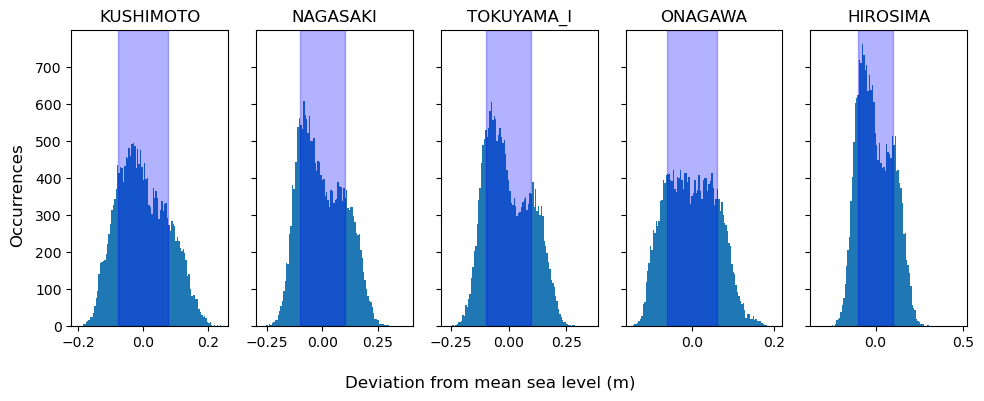

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=5, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))


axs[0].hist(ds.KUSHIMOTO-ds.KUSHIMOTO.mean(), bins=100)
axs[1].hist(ds.NAGASAKI-ds.NAGASAKI.mean(), bins=100)
axs[2].hist(ds.TOKUYAMA_I-ds.TOKUYAMA_I.mean(), bins=100)
axs[3].hist(ds.ONAGAWA-ds.ONAGAWA.mean(), bins=100)
axs[4].hist(ds.HIROSIMA-ds.HIROSIMA.mean(), bins=100)

axs[0].axvspan(-1*ds.KUSHIMOTO.std(),ds.KUSHIMOTO.std(), alpha=0.3, color='blue')
axs[1].axvspan(-1*ds.NAGASAKI.std(),ds.NAGASAKI.std(), alpha=0.3, color='blue')
axs[2].axvspan(-1*ds.TOKUYAMA_I.std(),ds.TOKUYAMA_I.std(), alpha=0.3, color='blue')
axs[3].axvspan(-1*ds.ONAGAWA.std(),ds.ONAGAWA.std(), alpha=0.3, color='blue')
axs[4].axvspan(-1*ds.HIROSIMA.std(),ds.HIROSIMA.std(), alpha=0.3, color='blue')

axs[0].set_title('KUSHIMOTO')
axs[1].set_title('NAGASAKI')
axs[2].set_title('TOKUYAMA_I')
axs[3].set_title('ONAGAWA')
axs[4].set_title('HIROSIMA')

fig.supxlabel("Deviation from mean sea level (m)")
fig.supylabel("Occurrences")

plt.show()

#Bimodal distribution- because of typhoons or tsunamis
#Cayman island have a similar but less exaggerated shape and primarily experiences hurricanes

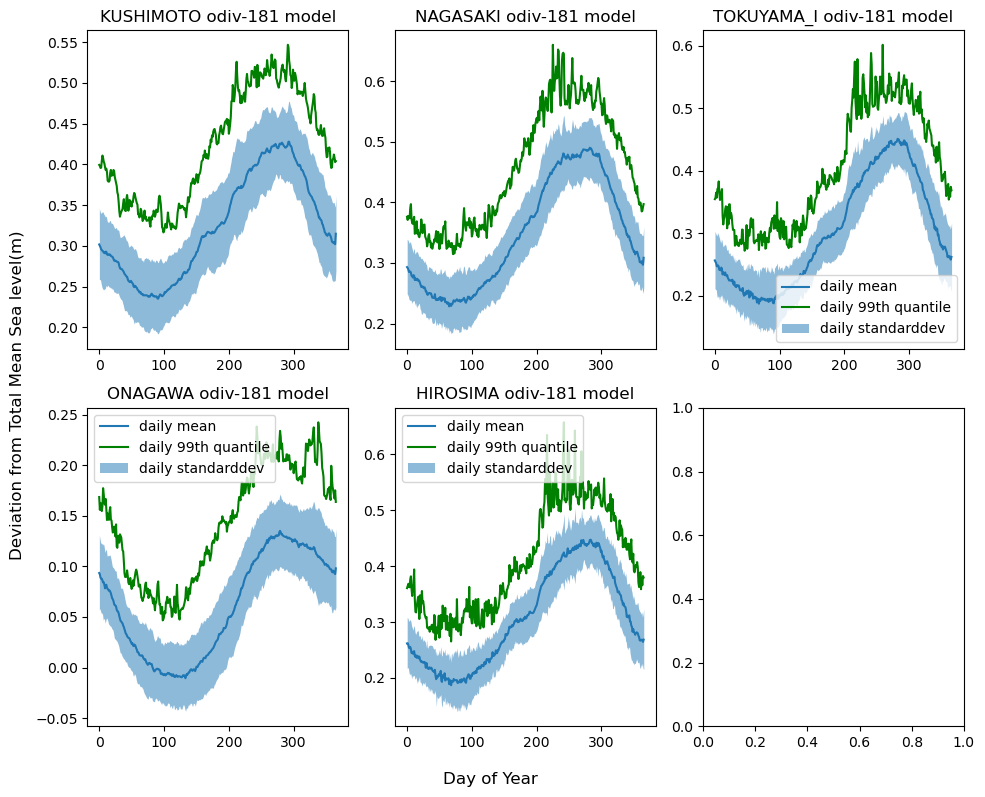

In [13]:
fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, tight_layout=True, figsize=(10,8))

seasonal_stdev = ds.KUSHIMOTO.groupby(ds.KUSHIMOTO.time.dt.dayofyear).std()
seasonal_mean = ds.KUSHIMOTO.groupby(ds.KUSHIMOTO.time.dt.dayofyear).mean()
seasonal_q99 = ds.KUSHIMOTO.groupby(ds.KUSHIMOTO.time.dt.dayofyear).quantile(0.99)
axs[0][0].plot(seasonal_mean, label='daily mean')
axs[0][0].plot(seasonal_q99, color='green', label='99th quantile')
axs[0][0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[0][0].set_title("KUSHIMOTO odiv-181 model")

seasonal_stdev = ds.NAGASAKI.groupby(ds.NAGASAKI.time.dt.dayofyear).std()
seasonal_mean= ds.NAGASAKI.groupby(ds.NAGASAKI.time.dt.dayofyear).mean()
seasonal_q99 = ds.NAGASAKI.groupby(ds.NAGASAKI.time.dt.dayofyear).quantile(0.99)
axs[0][1].plot(seasonal_mean, label='daily mean')
axs[0][1].plot(seasonal_q99, color='green', label='99th quantile')
axs[0][1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='standard dev')
axs[0][1].set_title("NAGASAKI odiv-181 model")

seasonal_stdev = ds.HIROSIMA.groupby(ds.HIROSIMA.time.dt.dayofyear).std()
seasonal_mean = ds.HIROSIMA.groupby(ds.HIROSIMA.time.dt.dayofyear).mean()
seasonal_q99 = ds.HIROSIMA.groupby(ds.HIROSIMA.time.dt.dayofyear).quantile(0.99)
axs[1][1].plot(seasonal_mean, label='daily mean')
axs[1][1].plot(seasonal_q99, color='green', label='daily 99th quantile')
axs[1][1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily standarddev')
axs[1][1].legend()
axs[1][1].set_title("HIROSIMA odiv-181 model")

seasonal_stdev = ds.ONAGAWA.groupby(ds.ONAGAWA.time.dt.dayofyear).std()
seasonal_mean = ds.ONAGAWA.groupby(ds.ONAGAWA.time.dt.dayofyear).mean()
seasonal_q99 = ds.ONAGAWA.groupby(ds.ONAGAWA.time.dt.dayofyear).quantile(0.99)
axs[1][0].plot(seasonal_mean, label='daily mean')
axs[1][0].plot(seasonal_q99, color='green', label='daily 99th quantile')
axs[1][0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily standarddev')
axs[1][0].legend()
axs[1][0].set_title("ONAGAWA odiv-181 model")

seasonal_stdev = ds.TOKUYAMA_I.groupby(ds.TOKUYAMA_I.time.dt.dayofyear).std()
seasonal_mean = ds.TOKUYAMA_I.groupby(ds.TOKUYAMA_I.time.dt.dayofyear).mean()
seasonal_q99 = ds.TOKUYAMA_I.groupby(ds.TOKUYAMA_I.time.dt.dayofyear).quantile(0.99)
axs[0][2].plot(seasonal_mean, label='daily mean')
axs[0][2].plot(seasonal_q99, color='green', label='daily 99th quantile')
axs[0][2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily standarddev')
axs[0][2].legend()
axs[0][2].set_title("TOKUYAMA_I odiv-181 model")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()

Text(0.5, 0, 'Day of Year')

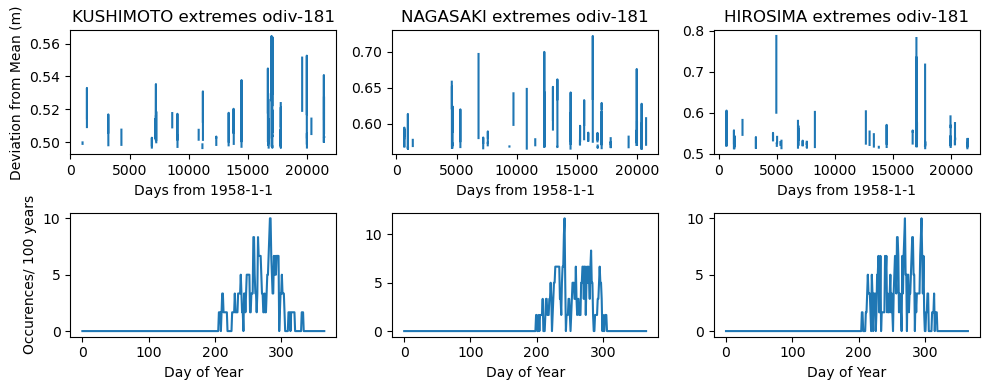

In [14]:
fig, axs = plt.subplots(2, 3, sharex=False, tight_layout=True, figsize=(10,4))

q99 =ds.KUSHIMOTO.quantile(0.99)
ds_extreme = ds.KUSHIMOTO.where(ds.KUSHIMOTO>= q99)
axs[0][0].plot( ds_extreme)
axs[0][0].set_title("KUSHIMOTO extremes odiv-181")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(ds.KUSHIMOTO.time.dt.dayofyear).count()/(len(ds.KUSHIMOTO.time)/(100*365))
axs[1][0].plot(occurrences)
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")

q99 =ds.NAGASAKI.quantile(0.99)
ds_extreme = ds.NAGASAKI.where(ds.NAGASAKI>= q99)
axs[0][1].plot(ds_extreme)
axs[0][1].set_title("NAGASAKI extremes odiv-181")
axs[0][1].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(ds.NAGASAKI.time.dt.dayofyear).count()/(len(ds.NAGASAKI.time)/(100*365))
axs[1][1].plot(occurrences)
axs[1][1].set_xlabel("Day of Year")

q99 =ds.HIROSIMA.quantile(0.99)
ds_extreme = ds.HIROSIMA.where(ds.HIROSIMA>= q99)
axs[0][2].plot(ds_extreme)
axs[0][2].set_title("HIROSIMA extremes odiv-181")
axs[0][2].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(ds.HIROSIMA.time.dt.dayofyear).count()/(len(ds.HIROSIMA.time)/(100*365))
axs[1][2].plot(occurrences)
axs[1][2].set_xlabel("Day of Year")


## Odiv 2 Model

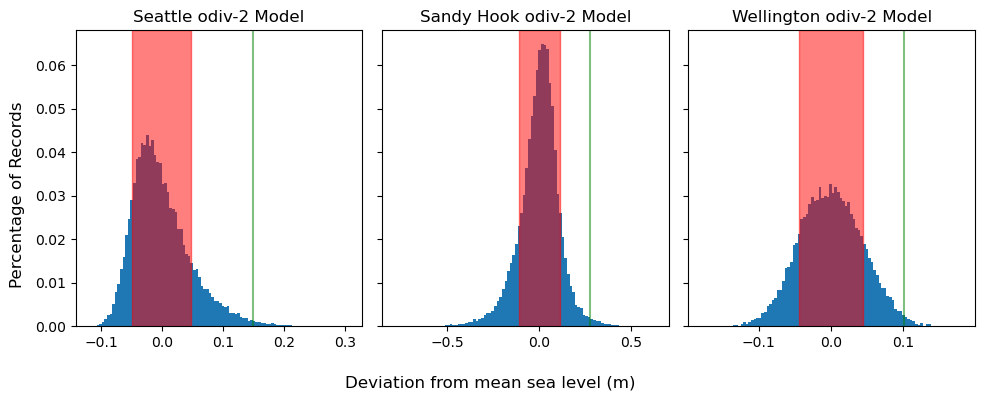

In [30]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))

#create histogram of variance around mean sea level
axs[0].hist(da.SEATTLE-da.SEATTLE.mean(), bins=100,weights=1/len(da.SEATTLE) * np.ones(len(da.SEATTLE)))
axs[1].hist(da.SANDY_HOOK-da.SANDY_HOOK.mean(), bins=100,weights=1/len(da.SANDY_HOOK) * np.ones(len(da.SANDY_HOOK))) #this is actually portland,maine
axs[2].hist(da.WELLINGTON_HARBOUR-da.WELLINGTON_HARBOUR.mean(), bins=100, weights=1/len(da.WELLINGTON_HARBOUR) * np.ones(len(da.WELLINGTON_HARBOUR)))

axs[0].axvspan(-1*da.SEATTLE.std(),da.SEATTLE.std(), alpha=0.5, color='red')
axs[1].axvspan(-1*da.SANDY_HOOK.std(),da.SANDY_HOOK.std(), alpha=0.5, color='red')
axs[2].axvspan(-1*da.WELLINGTON_HARBOUR.std(),da.WELLINGTON_HARBOUR.std(), alpha=0.5, color='red')

axs[0].axvline(da.SEATTLE.quantile(0.99)-da.SEATTLE.mean(), alpha=0.5, color='green')
axs[1].axvline(da.SANDY_HOOK.quantile(0.99)-da.SANDY_HOOK.mean(), alpha=0.5, color='green')
axs[2].axvline(da.WELLINGTON_HARBOUR.quantile(0.99)-da.WELLINGTON_HARBOUR.mean(), alpha=0.5, color='green')

axs[0].set_title('Seattle odiv-2 Model')
axs[1].set_title('Sandy Hook odiv-2 Model')
axs[2].set_title('Wellington odiv-2 Model')

fig.supxlabel("Deviation from mean sea level (m)")
fig.supylabel("Percentage of Records")

plt.show()

Text(0.5, 0, 'Day of Year')

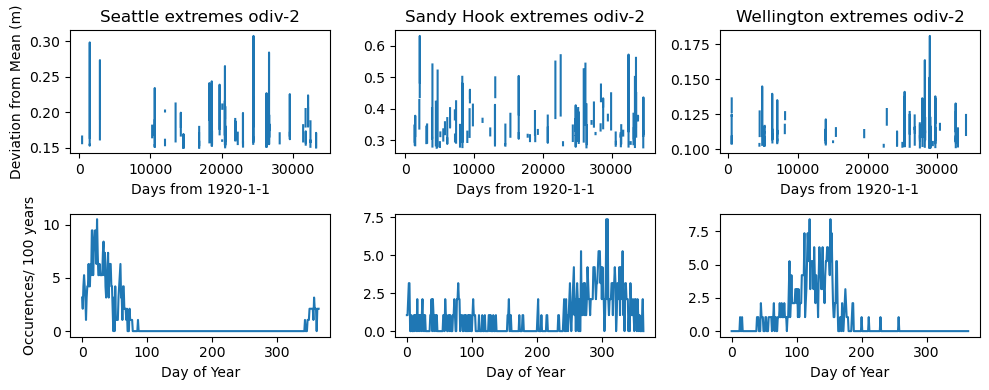

In [5]:
fig, axs = plt.subplots(2, 3, sharex=False, tight_layout=True, figsize=(10,4))

q99 =da.SEATTLE.quantile(0.99)
da_extreme = da.SEATTLE.where(da.SEATTLE>= q99)
axs[0][0].plot( da_extreme-da.SEATTLE.mean())
axs[0][0].set_title("Seattle extremes odiv-2")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1920-1-1")

occurrences=da_extreme.groupby(da.SEATTLE.time.dt.dayofyear).count()/(len(da.SEATTLE.time)/(100*365))
axs[1][0].plot(occurrences)
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")

q99 =da.SANDY_HOOK.quantile(0.99)
da_extreme = da.SANDY_HOOK.where(da.SANDY_HOOK>= q99)
axs[0][1].plot(da_extreme-da.SANDY_HOOK.mean())
axs[0][1].set_title("Sandy Hook extremes odiv-2")
axs[0][1].set_xlabel("Days from 1920-1-1")

occurrences=da_extreme.groupby(da.SANDY_HOOK.time.dt.dayofyear).count()/(len(da.SANDY_HOOK.time)/(100*365))
axs[1][1].plot(occurrences)
axs[1][1].set_xlabel("Day of Year")

q99 =da.WELLINGTON_HARBOUR.quantile(0.99)
da_extreme = da.WELLINGTON_HARBOUR.where(da.WELLINGTON_HARBOUR>= q99)
axs[0][2].plot(da_extreme-da.WELLINGTON_HARBOUR.mean())
axs[0][2].set_title("Wellington extremes odiv-2")
axs[0][2].set_xlabel("Days from 1920-1-1")

occurrences=da_extreme.groupby(da.WELLINGTON_HARBOUR.time.dt.dayofyear).count()/(len(da.WELLINGTON_HARBOUR.time)/(100*365))
axs[1][2].plot(occurrences)
axs[1][2].set_xlabel("Day of Year")


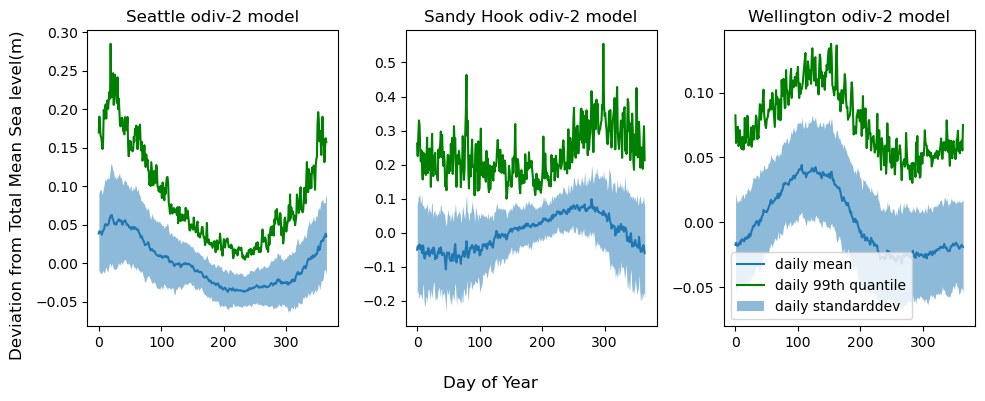

In [10]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, tight_layout=True, figsize=(10,4))

seasonal_stdev = da.SEATTLE.groupby(da.SEATTLE.time.dt.dayofyear).std()
seasonal_mean = da.SEATTLE.groupby(da.SEATTLE.time.dt.dayofyear).mean()
seasonal_q99 = da.SEATTLE.groupby(da.SEATTLE.time.dt.dayofyear).quantile(0.99)
axs[0].plot(seasonal_mean-da.SEATTLE.mean(), label='daily mean')
axs[0].plot(seasonal_q99-da.SEATTLE.mean(), color='green', label='99th quantile')
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev-da.SEATTLE.mean(),seasonal_mean-seasonal_stdev-da.SEATTLE.mean(), alpha=0.5,label='daily stdev')
axs[0].set_title("Seattle odiv-2 model")

seasonal_stdev = da.SANDY_HOOK.groupby(da.SANDY_HOOK.time.dt.dayofyear).std()
seasonal_mean= da.SANDY_HOOK.groupby(da.SANDY_HOOK.time.dt.dayofyear).mean()
seasonal_q99 = da.SANDY_HOOK.groupby(da.SANDY_HOOK.time.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean-da.SANDY_HOOK.mean(), label='daily mean')
axs[1].plot(seasonal_q99-da.SANDY_HOOK.mean(), color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev-da.SANDY_HOOK.mean(),seasonal_mean-seasonal_stdev-da.SANDY_HOOK.mean(), alpha=0.5,label='standard dev')
axs[1].set_title("Sandy Hook odiv-2 model")

seasonal_stdev = da.WELLINGTON_HARBOUR.groupby(da.WELLINGTON_HARBOUR.time.dt.dayofyear).std()
seasonal_mean = da.WELLINGTON_HARBOUR.groupby(da.WELLINGTON_HARBOUR.time.dt.dayofyear).mean()
seasonal_q99 = da.WELLINGTON_HARBOUR.groupby(da.WELLINGTON_HARBOUR.time.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean-da.WELLINGTON_HARBOUR.mean(), label='daily mean')
axs[2].plot(seasonal_q99-da.WELLINGTON_HARBOUR.mean(), color='green', label='daily 99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev-da.WELLINGTON_HARBOUR.mean(),seasonal_mean-seasonal_stdev-da.WELLINGTON_HARBOUR.mean(), alpha=0.5,label='daily standarddev')
axs[2].legend()
axs[2].set_title("Wellington odiv-2 model")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()

## Odiv181 Model

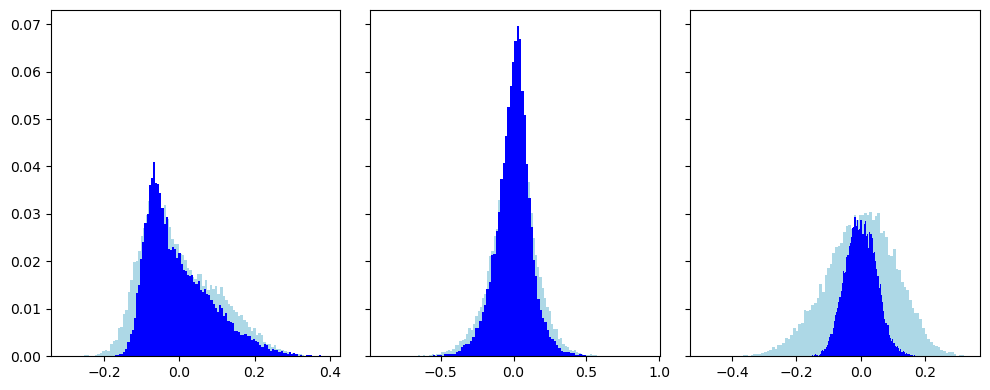

In [12]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))

seattle=ds.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl181_seattle)
sandyhook =ds.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl181_sandyhook)
wellington =ds.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))+np.array(psl181_wellington)

axs[0].hist(seattle-seattle.mean(), bins=100, weights=1/len(seattle) * np.ones(len(seattle)),color='lightblue')
axs[1].hist(sandyhook-sandyhook.mean(), bins=100, weights=1/len(sandyhook) * np.ones(len(sandyhook)),color='lightblue')
axs[2].hist(wellington-wellington.mean(), bins=100, weights=1/len(wellington) * np.ones(len(wellington)),color='lightblue')

seattle=ds.SEATTLE.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
sandyhook =ds.SANDY_HOOK.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))
wellington =ds.WELLINGTON_HARBOUR.sel(time=slice(f"{1958}-01-01", f"{2014}-12-31"))

axs[0].hist(seattle-seattle.mean(), bins=100, weights=1/len(seattle) * np.ones(len(seattle)),color='blue')
axs[1].hist(sandyhook-sandyhook.mean(), bins=100, weights=1/len(sandyhook) * np.ones(len(sandyhook)),color='blue')
axs[2].hist(wellington-wellington.mean(), bins=100, weights=1/len(wellington) * np.ones(len(wellington)),color='blue')

plt.show()

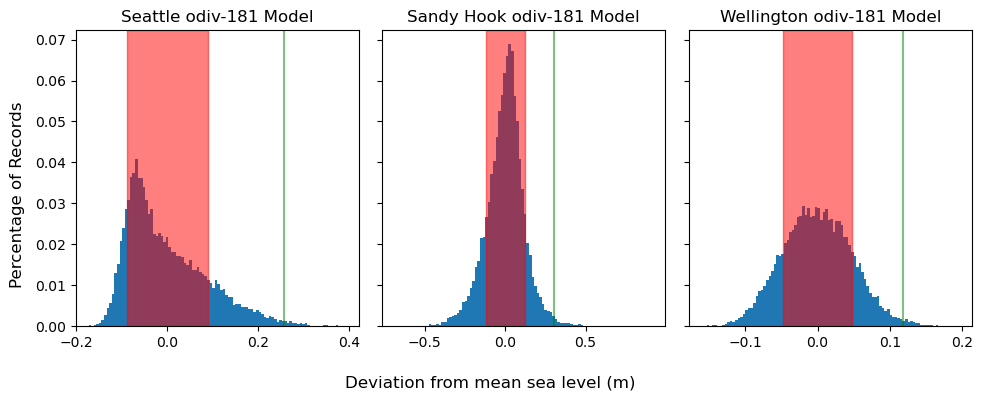

In [19]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))

#create histogram of variance around mean sea level
axs[0].hist(ds.SEATTLE-ds.SEATTLE.mean(), bins=100,weights=1/len(ds.SEATTLE) * np.ones(len(ds.SEATTLE)))
axs[1].hist(ds.SANDY_HOOK-ds.SANDY_HOOK.mean(), bins=100,weights=1/len(ds.SANDY_HOOK) * np.ones(len(ds.SANDY_HOOK))) #this is actually portland,maine
axs[2].hist(ds.WELLINGTON_HARBOUR-ds.WELLINGTON_HARBOUR.mean(), bins=100, weights=1/len(ds.WELLINGTON_HARBOUR) * np.ones(len(ds.WELLINGTON_HARBOUR)))

#axs[0].set_xlim([-2,2])
#axs[0].margins(4, 1)
#axs[1].margins(1.5, 1)
#axs[2].margins(3, 1)

#show stdev
axs[0].axvspan(-1*ds.SEATTLE.std(),ds.SEATTLE.std(), alpha=0.5, color='red')
axs[1].axvspan(-1*ds.SANDY_HOOK.std(),ds.SANDY_HOOK.std(), alpha=0.5, color='red')
axs[2].axvspan(-1*ds.WELLINGTON_HARBOUR.std(),ds.WELLINGTON_HARBOUR.std(), alpha=0.5, color='red')

axs[0].axvline(ds.SEATTLE.quantile(0.99)-ds.SEATTLE.mean(), alpha=0.5, color='green')
axs[1].axvline(ds.SANDY_HOOK.quantile(0.99)-ds.SANDY_HOOK.mean(), alpha=0.5, color='green')
axs[2].axvline(ds.WELLINGTON_HARBOUR.quantile(0.99)-ds.WELLINGTON_HARBOUR.mean(), alpha=0.5, color='green')

axs[0].set_title('Seattle odiv-181 Model')
axs[1].set_title('Sandy Hook odiv-181 Model')
axs[2].set_title('Wellington odiv-181 Model')

fig.supxlabel("Deviation from mean sea level (m)")
fig.supylabel("Percentage of Records")

plt.show()

(0.0, 11.0)

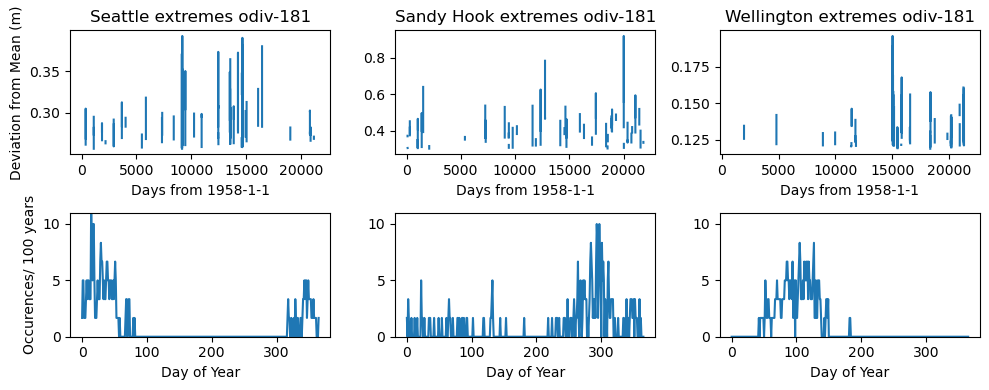

In [46]:
fig, axs = plt.subplots(2, 3, sharex=False, tight_layout=True, figsize=(10,4))

q99 =ds.SEATTLE.quantile(0.99)
ds_extreme = ds.SEATTLE.where(ds.SEATTLE>= q99)
axs[0][0].plot(ds_extreme-ds.SEATTLE.mean())
axs[0][0].set_title("Seattle extremes odiv-181")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(ds.SEATTLE.time.dt.dayofyear).count()/(len(ds.SEATTLE.time)/(100*365))
axs[1][0].plot(occurrences)
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,11)

q99 =ds.SANDY_HOOK.quantile(0.99)
ds_extreme = ds.SANDY_HOOK.where(ds.SANDY_HOOK>= q99)
axs[0][1].plot(ds_extreme-ds.SANDY_HOOK.mean())
axs[0][1].set_title("Sandy Hook extremes odiv-181")
axs[0][1].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(ds.SANDY_HOOK.time.dt.dayofyear).count()/(len(ds.SANDY_HOOK.time)/(100*365))
axs[1][1].plot(occurrences)
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,11)

q99 =ds.WELLINGTON_HARBOUR.quantile(0.99)
ds_extreme = ds.WELLINGTON_HARBOUR.where(ds.WELLINGTON_HARBOUR>= q99)
axs[0][2].plot(ds_extreme-ds.WELLINGTON_HARBOUR.mean())
axs[0][2].set_title("Wellington extremes odiv-181")
axs[0][2].set_xlabel("Days from 1958-1-1")

occurrences=ds_extreme.groupby(ds.WELLINGTON_HARBOUR.time.dt.dayofyear).count()/(len(ds.WELLINGTON_HARBOUR.time)/(100*365))
axs[1][2].plot(occurrences)
axs[1][2].set_xlabel("Day of Year")
axs[1][2].set_ylim(0,11)


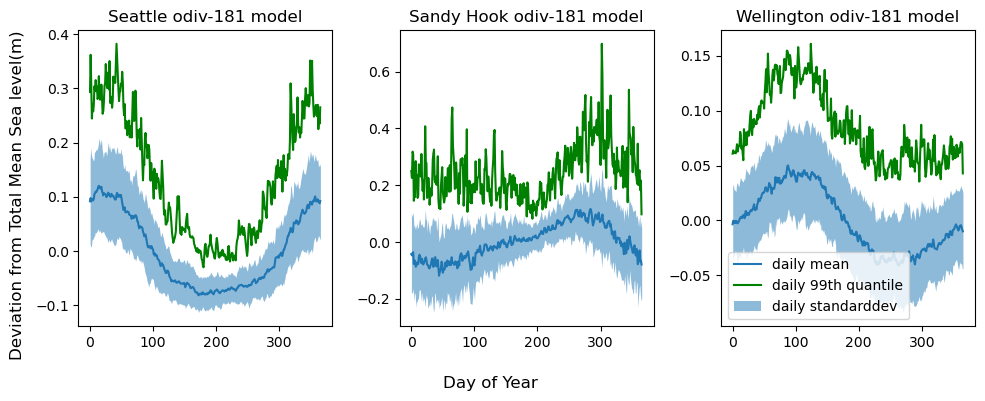

In [12]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, tight_layout=True, figsize=(10,4))

seasonal_stdev = ds.SEATTLE.groupby(ds.SEATTLE.time.dt.dayofyear).std()
seasonal_mean = ds.SEATTLE.groupby(ds.SEATTLE.time.dt.dayofyear).mean()
seasonal_q99 = ds.SEATTLE.groupby(ds.SEATTLE.time.dt.dayofyear).quantile(0.99)
axs[0].plot(seasonal_mean-ds.SEATTLE.mean(), label='daily mean')
axs[0].plot(seasonal_q99-ds.SEATTLE.mean(), color='green', label='99th quantile')
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev-ds.SEATTLE.mean(),seasonal_mean-seasonal_stdev-ds.SEATTLE.mean(), alpha=0.5,label='daily stdev')
axs[0].set_title("Seattle odiv-181 model")

seasonal_stdev = ds.SANDY_HOOK.groupby(ds.SANDY_HOOK.time.dt.dayofyear).std()
seasonal_mean= ds.SANDY_HOOK.groupby(ds.SANDY_HOOK.time.dt.dayofyear).mean()
seasonal_q99 = ds.SANDY_HOOK.groupby(ds.SANDY_HOOK.time.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean-ds.SANDY_HOOK.mean(), label='daily mean')
axs[1].plot(seasonal_q99-ds.SANDY_HOOK.mean(), color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev-ds.SANDY_HOOK.mean(),seasonal_mean-seasonal_stdev-ds.SANDY_HOOK.mean(), alpha=0.5,label='standard dev')
axs[1].set_title("Sandy Hook odiv-181 model")

seasonal_stdev = ds.WELLINGTON_HARBOUR.groupby(ds.WELLINGTON_HARBOUR.time.dt.dayofyear).std()
seasonal_mean = ds.WELLINGTON_HARBOUR.groupby(ds.WELLINGTON_HARBOUR.time.dt.dayofyear).mean()
seasonal_q99 = ds.WELLINGTON_HARBOUR.groupby(ds.WELLINGTON_HARBOUR.time.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean-ds.WELLINGTON_HARBOUR.mean(), label='daily mean')
axs[2].plot(seasonal_q99-ds.WELLINGTON_HARBOUR.mean(), color='green', label='daily 99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev-ds.WELLINGTON_HARBOUR.mean(),seasonal_mean-seasonal_stdev-ds.WELLINGTON_HARBOUR.mean(), alpha=0.5,label='daily standarddev')
axs[2].legend()
axs[2].set_title("Wellington odiv-181 model")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()

## Observations

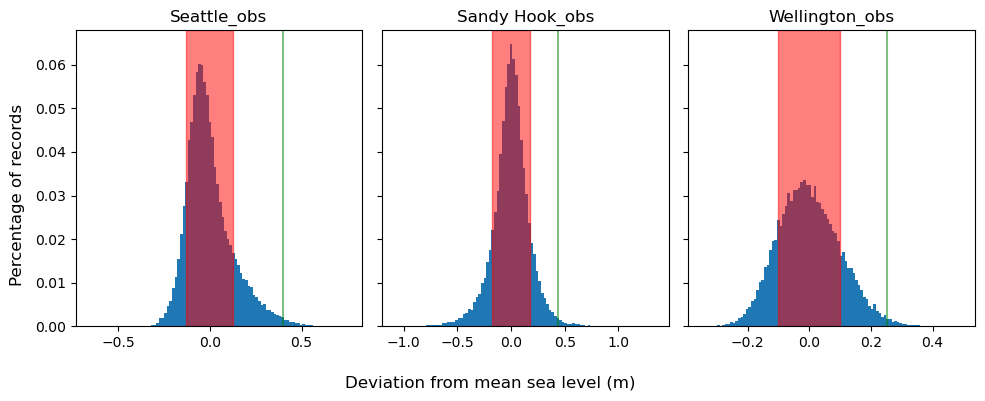

In [6]:
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, tight_layout=True, figsize=(10,4))

#create histogram of variance around mean sea level
axs[0].hist(obs_seattle.sealevel_tr, bins=100, weights=1/len(obs_seattle.sealevel_tr) * np.ones(len(obs_seattle.sealevel_tr)))
axs[1].hist(obs_sandyhook.sealevel_tr, bins=100, weights=1/len(obs_sandyhook.sealevel_tr) * np.ones(len(obs_sandyhook.sealevel_tr))) #this is actually portland,maine
axs[2].hist(obs_wellington.sealevel_tr, bins=100, weights=1/len(obs_wellington.sealevel_tr) * np.ones(len(obs_wellington.sealevel_tr)))
#show stdev
axs[0].axvspan(-1*obs_seattle.sealevel_tr.std(),obs_seattle.sealevel_tr.std(), alpha=0.5, color='red')
axs[1].axvspan(-1*obs_sandyhook.sealevel_tr.std(),obs_sandyhook.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvspan(-1*obs_wellington.sealevel_tr.std(),obs_wellington.sealevel_tr.std(), alpha=0.5, color='red')

axs[0].axvline(obs_seattle.sealevel_tr.quantile(0.99)-obs_seattle.sealevel_tr.mean(), alpha=0.5, color='green')
axs[1].axvline(obs_sandyhook.sealevel_tr.quantile(0.99)-obs_sandyhook.sealevel_tr.mean(), alpha=0.5, color='green')
axs[2].axvline(obs_wellington.sealevel_tr.quantile(0.99)-obs_wellington.sealevel_tr.mean(), alpha=0.5, color='green')

axs[0].set_title('Seattle_obs')
axs[1].set_title('Sandy Hook_obs')
axs[2].set_title('Wellington_obs')

fig.supxlabel("Deviation from mean sea level (m)")
fig.supylabel("Percentage of records")

plt.show()

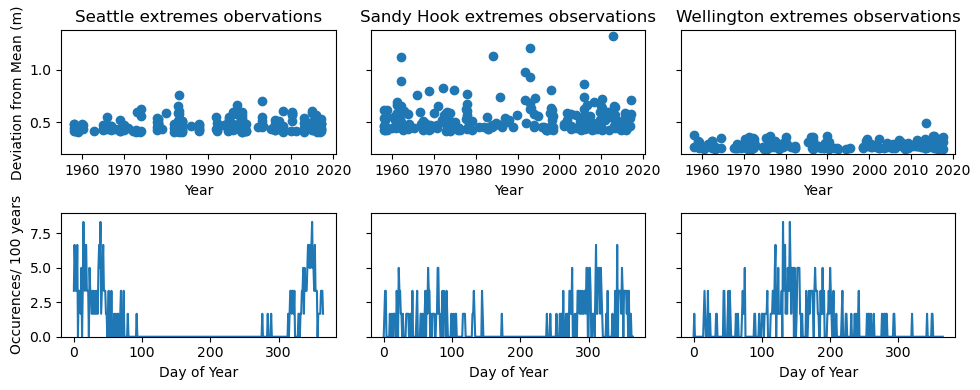

In [15]:
#Plots extreme events over time series
fig, axs = plt.subplots(2, 3, sharex='row',sharey='row', tight_layout=True, figsize=(10,4))


q99 =obs_seattle.sealevel_tr.quantile(0.99)
ds_extreme = obs_seattle.where(obs_seattle.sealevel_tr>= q99)
axs[0][0].scatter(obs_seattle.datetime, ds_extreme.sealevel_tr)
axs[0][0].set_title("Seattle extremes obervations")
axs[0][0].set_ylabel("Deviation from Mean (m)")
axs[0][0].set_xlabel("Year")

occurrences=ds_extreme.sealevel_tr.groupby(obs_seattle.datetime.dt.dayofyear).count()/(len(obs_seattle.datetime)/(100*365))
axs[1][0].plot(occurrences)
axs[1][0].set_ylabel("Occurences/ 100 years")
axs[1][0].set_xlabel("Day of Year")
axs[1][0].set_ylim(0,9)

q99 =obs_sandyhook.sealevel_tr.quantile(0.99)
ds_extreme = obs_sandyhook.where(obs_sandyhook.sealevel_tr>= q99)
axs[0][1].scatter(obs_sandyhook.datetime, ds_extreme.sealevel_tr)
axs[0][1].set_title("Sandy Hook extremes observations")
axs[0][1].set_xlabel("Year")

occurrences=ds_extreme.sealevel_tr.groupby(obs_sandyhook.datetime.dt.dayofyear).count()/(len(obs_sandyhook.datetime)/(100*365))
axs[1][1].plot(occurrences)
axs[1][1].set_xlabel("Day of Year")
axs[1][1].set_ylim(0,9)

q99 =obs_wellington.sealevel_tr.quantile(0.99)
ds_extreme = obs_wellington.where(obs_wellington.sealevel_tr>= q99)
axs[0][2].scatter(obs_wellington.datetime, ds_extreme.sealevel_tr)
axs[0][2].set_title("Wellington extremes observations")
axs[0][2].set_xlabel("Year")

occurrences=ds_extreme.sealevel_tr.groupby(obs_wellington.datetime.dt.dayofyear).count()/(len(obs_wellington.datetime)/(100*365))
axs[1][2].plot(occurrences)
axs[1][2].set_xlabel("Day of Year")
axs[1][2].set_ylim(0,9)


plt.show()

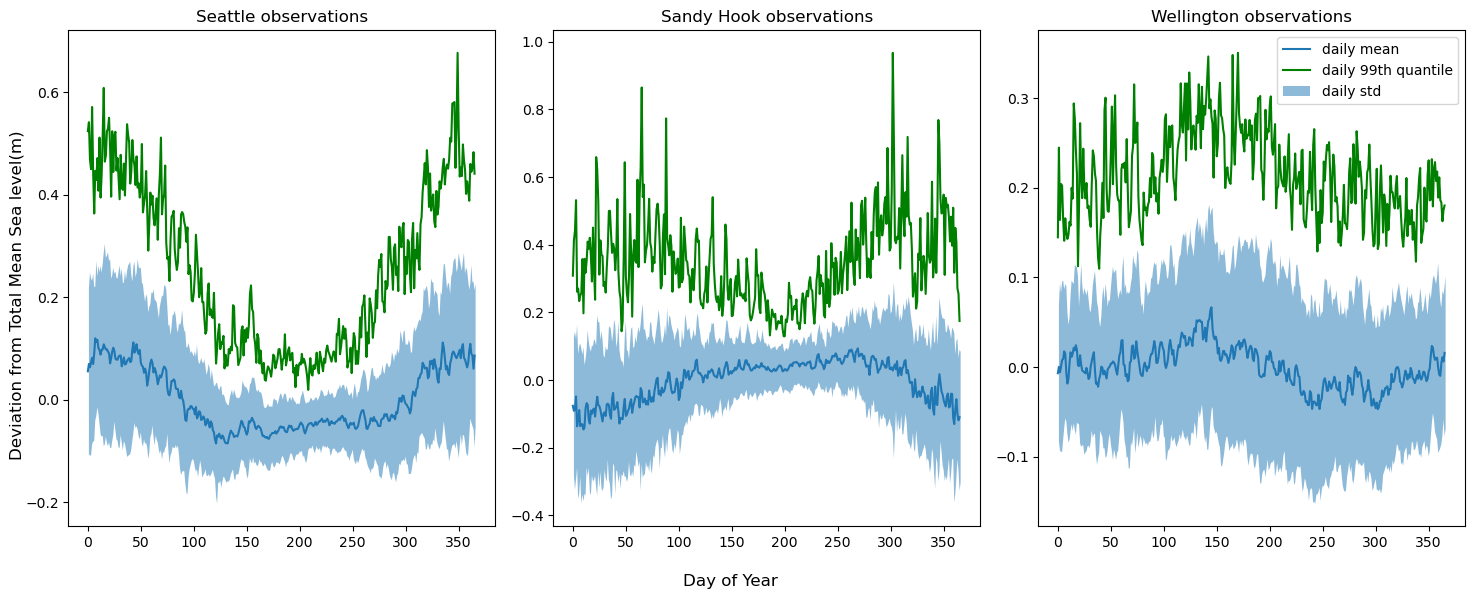

In [8]:
# Plot mean for each day of the year to show seasonal cycle
fig, axs = plt.subplots(1, 3, sharex=False, sharey=False, tight_layout=True, figsize=(15,6))

seasonal_stdev = obs_seattle.sealevel_tr.groupby(obs_seattle.datetime.dt.dayofyear).std()
seasonal_mean = obs_seattle.sealevel_tr.groupby(obs_seattle.datetime.dt.dayofyear).mean()
seasonal_q99 = obs_seattle.sealevel_tr.groupby(obs_seattle.datetime.dt.dayofyear).quantile(0.99)
axs[0].plot(seasonal_mean, label='daily mean')
axs[0].plot(seasonal_q99, color='green', label='99th quantile')
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily std')
axs[0].set_title("Seattle observations")

seasonal_stdev = obs_sandyhook.sealevel_tr.groupby(obs_sandyhook.datetime.dt.dayofyear).std()
seasonal_mean= obs_sandyhook.sealevel_tr.groupby(obs_sandyhook.datetime.dt.dayofyear).mean()
seasonal_q99 = obs_sandyhook.sealevel_tr.groupby(obs_sandyhook.datetime.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean, label='daily mean')
axs[1].plot(seasonal_q99, color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily std')
axs[1].set_title("Sandy Hook observations")

seasonal_stdev = obs_wellington.sealevel_tr.groupby(obs_wellington.datetime.dt.dayofyear).std()
seasonal_mean = obs_wellington.sealevel_tr.groupby(obs_wellington.datetime.dt.dayofyear).mean()
seasonal_q99 = obs_wellington.sealevel_tr.groupby(obs_wellington.datetime.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean, label='daily mean')
axs[2].plot(seasonal_q99, color='green', label='daily 99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily std')
axs[2].legend()
axs[2].set_title("Wellington observations")

fig.supxlabel("Day of Year")
fig.supylabel("Deviation from Total Mean Sea level(m)")
plt.show()

## Reorganized

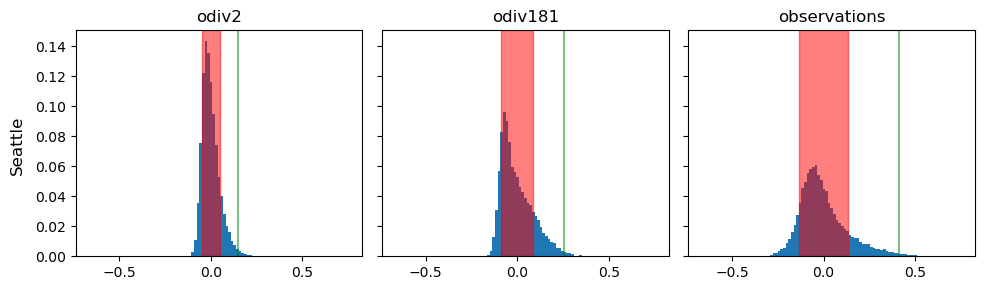

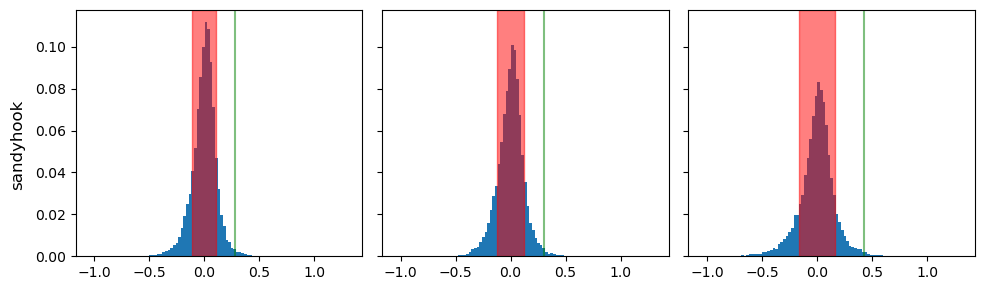

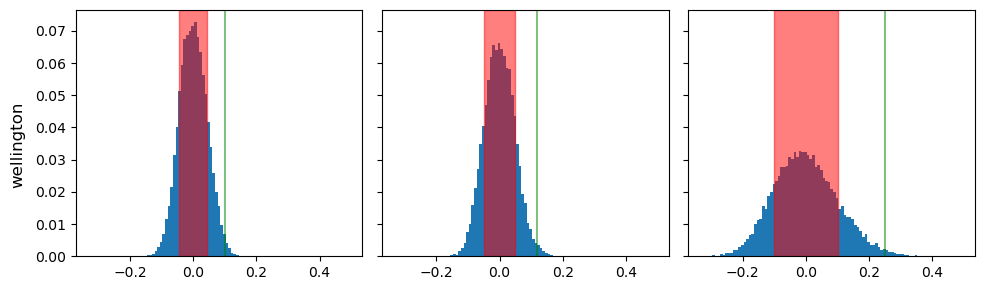

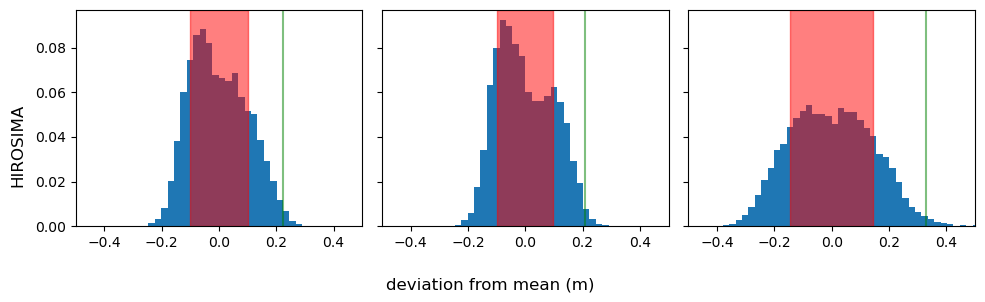

In [11]:
bins=np.linspace(np.float64(obs_seattle.sealevel_tr.min()),np.float64(obs_seattle.sealevel_tr.max()), 100)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, figsize=(10,3))

axs[0].hist(da.SEATTLE-da.SEATTLE.mean(), bins=bins, weights=1/len(da.SEATTLE) * np.ones(len(da.SEATTLE)))
axs[0].axvspan(-1*da.SEATTLE.std(),da.SEATTLE.std(), alpha=0.5, color='red')
axs[0].axvline(da.SEATTLE.quantile(0.99)-da.SEATTLE.mean(), alpha=0.5, color='green')
axs[0].set_title('odiv2')

axs[1].hist(ds.SEATTLE-ds.SEATTLE.mean(), bins=bins, weights=1/len(ds.SEATTLE) * np.ones(len(ds.SEATTLE)))
axs[1].axvspan(-1*ds.SEATTLE.std(),ds.SEATTLE.std(), alpha=0.5, color='red')
axs[1].axvline(ds.SEATTLE.quantile(0.99)-ds.SEATTLE.mean(), alpha=0.5, color='green')
axs[1].set_title('odiv181')

axs[2].hist(obs_seattle.sealevel_tr, bins=bins, weights=1/len(obs_seattle.sealevel_tr) * np.ones(len(obs_seattle.sealevel_tr)))
axs[2].axvspan(-1*obs_seattle.sealevel_tr.std(),obs_seattle.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvline(obs_seattle.sealevel_tr.quantile(0.99)-obs_seattle.sealevel_tr.mean(), alpha=0.5, color='green')
axs[2].set_title('observations')

fig.supylabel('Seattle')
plt.show()

bins=np.linspace(np.float64(obs_sandyhook.sealevel_tr.min()),np.float64(obs_sandyhook.sealevel_tr.max()), 100)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, figsize=(10,3))

axs[0].hist(da.SANDY_HOOK-da.SANDY_HOOK.mean(), bins=bins, weights=1/len(da.SANDY_HOOK) * np.ones(len(da.SANDY_HOOK)))
axs[0].axvspan(-1*da.SANDY_HOOK.std(),da.SANDY_HOOK.std(), alpha=0.5, color='red')
axs[0].axvline(da.SANDY_HOOK.quantile(0.99)-da.SANDY_HOOK.mean(), alpha=0.5, color='green')

axs[1].hist(ds.SANDY_HOOK-ds.SANDY_HOOK.mean(), bins=bins, weights=1/len(ds.SANDY_HOOK) * np.ones(len(ds.SANDY_HOOK)))
axs[1].axvspan(-1*ds.SANDY_HOOK.std(),ds.SANDY_HOOK.std(), alpha=0.5, color='red')
axs[1].axvline(ds.SANDY_HOOK.quantile(0.99)-ds.SANDY_HOOK.mean(), alpha=0.5, color='green')

axs[2].hist(obs_sandyhook.sealevel_tr, bins=bins, weights=1/len(obs_sandyhook.sealevel_tr) * np.ones(len(obs_sandyhook.sealevel_tr)))
axs[2].axvspan(-1*obs_sandyhook.sealevel_tr.std(),obs_sandyhook.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvline(obs_sandyhook.sealevel_tr.quantile(0.99)-obs_sandyhook.sealevel_tr.mean(), alpha=0.5, color='green')

fig.supylabel('sandyhook')
plt.show()

bins=np.linspace(np.float64(obs_wellington.sealevel_tr.min()),np.float64(obs_wellington.sealevel_tr.max()), 100)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, figsize=(10,3))

axs[0].hist(da.WELLINGTON_HARBOUR-da.WELLINGTON_HARBOUR.mean(), bins=bins, weights=1/len(da.WELLINGTON_HARBOUR) * np.ones(len(da.WELLINGTON_HARBOUR)))
axs[0].axvspan(-1*da.WELLINGTON_HARBOUR.std(),da.WELLINGTON_HARBOUR.std(), alpha=0.5, color='red')
axs[0].axvline(da.WELLINGTON_HARBOUR.quantile(0.99)-da.WELLINGTON_HARBOUR.mean(), alpha=0.5, color='green')

axs[1].hist(ds.WELLINGTON_HARBOUR-ds.WELLINGTON_HARBOUR.mean(), bins=bins, weights=1/len(ds.WELLINGTON_HARBOUR) * np.ones(len(ds.WELLINGTON_HARBOUR)))
axs[1].axvspan(-1*ds.WELLINGTON_HARBOUR.std(),ds.WELLINGTON_HARBOUR.std(), alpha=0.5, color='red')
axs[1].axvline(ds.WELLINGTON_HARBOUR.quantile(0.99)-ds.WELLINGTON_HARBOUR.mean(), alpha=0.5, color='green')

axs[2].hist(obs_wellington.sealevel_tr, bins=bins, weights=1/len(obs_wellington.sealevel_tr) * np.ones(len(obs_wellington.sealevel_tr)))
axs[2].axvspan(-1*obs_wellington.sealevel_tr.std(),obs_wellington.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvline(obs_wellington.sealevel_tr.quantile(0.99)-obs_wellington.sealevel_tr.mean(), alpha=0.5, color='green')

fig.supylabel('wellington')
plt.show()

bins=np.linspace(np.float64(obs_hiroshima.sealevel_tr.min()),np.float64(obs_hiroshima.sealevel_tr.max()), 100)

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, tight_layout=True, figsize=(10,3))

axs[0].hist(da.HIROSIMA-da.HIROSIMA.mean(), bins=bins, weights=1/len(da.HIROSIMA) * np.ones(len(da.HIROSIMA)))
axs[0].axvspan(-1*da.HIROSIMA.std(),da.HIROSIMA.std(), alpha=0.5, color='red')
axs[0].axvline(da.HIROSIMA.quantile(0.99)-da.HIROSIMA.mean(), alpha=0.5, color='green')

axs[1].hist(ds.HIROSIMA-ds.HIROSIMA.mean(), bins=bins, weights=1/len(ds.HIROSIMA) * np.ones(len(ds.HIROSIMA)))
axs[1].axvspan(-1*ds.HIROSIMA.std(),ds.HIROSIMA.std(), alpha=0.5, color='red')
axs[1].axvline(ds.HIROSIMA.quantile(0.99)-ds.HIROSIMA.mean(), alpha=0.5, color='green')

axs[2].hist(obs_hiroshima.sealevel_tr, bins=bins, weights=1/len(obs_hiroshima.sealevel_tr) * np.ones(len(obs_hiroshima.sealevel_tr)))
axs[2].axvspan(-1*obs_hiroshima.sealevel_tr.std(),obs_hiroshima.sealevel_tr.std(), alpha=0.5, color='red')
axs[2].axvline(obs_hiroshima.sealevel_tr.quantile(0.99)-obs_hiroshima.sealevel_tr.mean(), alpha=0.5, color='green')

axs[2].set_xlim(-0.5,0.5)

fig.supylabel('HIROSIMA')
fig.supxlabel('deviation from mean (m)')
plt.show()

## Statistics on Observation and Model outputs

In [16]:
ds.SANDY_HOOK.std().values, skew(ds.SANDY_HOOK.values), kurtosis(ds.SANDY_HOOK.values), ds.SANDY_HOOK.quantile(0.99)-ds.SANDY_HOOK.mean()

(array(0.12103149),
 -0.1377550648317269,
 1.9164578681152706,
 <xarray.DataArray 'SANDY_HOOK' ()> Size: 8B
 array(0.30332226)
 Coordinates:
     quantile  float64 8B 0.99)

In [18]:
ds.SEATTLE.std().values, skew(ds.SEATTLE.values), kurtosis(ds.SEATTLE.values), ds.SEATTLE.quantile(0.99)-ds.SEATTLE.mean()

(array(0.08863944),
 0.9648028413428966,
 0.5797097610907715,
 <xarray.DataArray 'SEATTLE' ()> Size: 8B
 array(0.25682569)
 Coordinates:
     quantile  float64 8B 0.99)

In [19]:
ds.WELLINGTON_HARBOUR.std().values,skew(ds.WELLINGTON_HARBOUR.values), kurtosis(ds.WELLINGTON_HARBOUR.values), ds.WELLINGTON_HARBOUR.quantile(0.99)-ds.WELLINGTON_HARBOUR.mean()

(array(0.04821275),
 0.12886363485008287,
 -0.0559400380655668,
 <xarray.DataArray 'WELLINGTON_HARBOUR' ()> Size: 8B
 array(0.11884675)
 Coordinates:
     quantile  float64 8B 0.99)

## Random Places

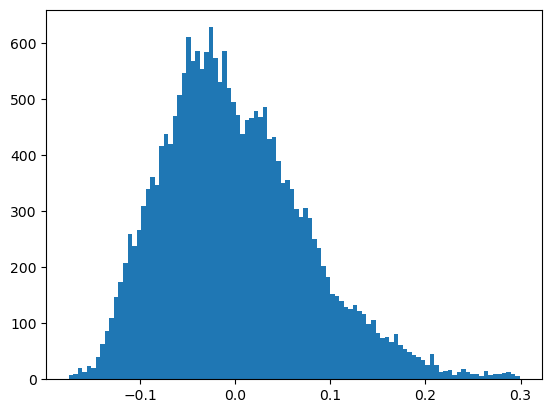

In [12]:
plt.hist(ds.SOUTH_SOUND-ds.SOUTH_SOUND.mean(), bins=100)
plt.show()

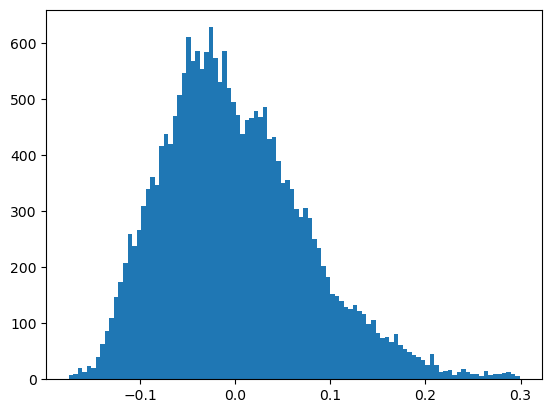

In [13]:
plt.hist(ds.NORTH_SOUND-ds.SOUTH_SOUND.mean(), bins=100)
plt.show()

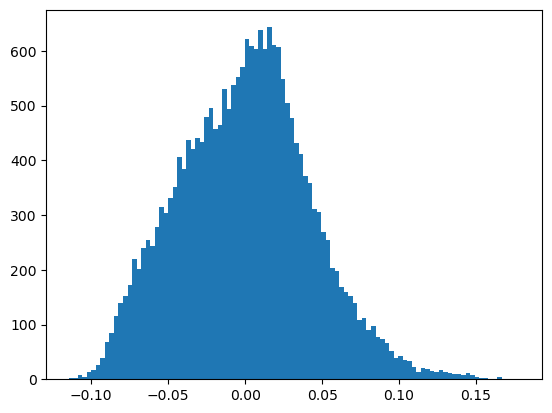

In [14]:
plt.hist(ds.LA_JOLLA-ds.LA_JOLLA.mean(), bins=100)
plt.show()

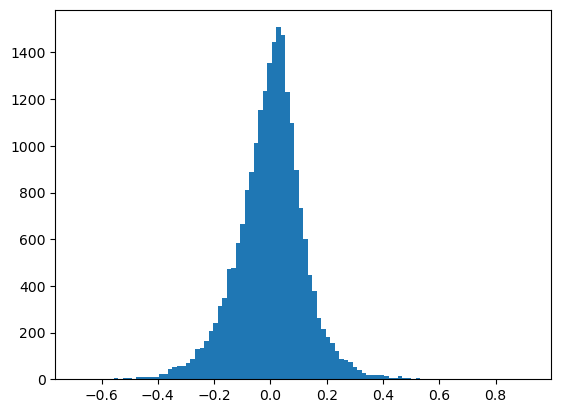

In [15]:
plt.hist(ds.SANDY_HOOK-ds.SANDY_HOOK.mean(), bins=100)
plt.show()

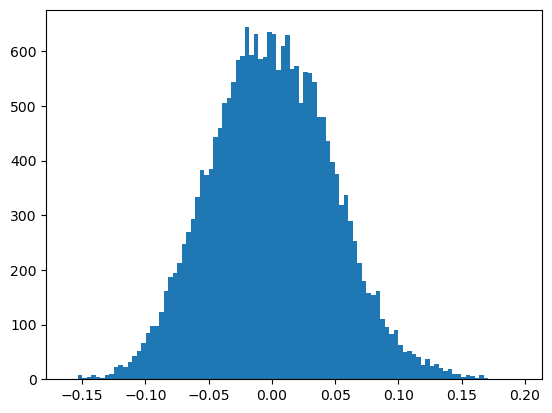

In [16]:
plt.hist(ds.WELLINGTON_HARBOUR-ds.WELLINGTON_HARBOUR.mean(), bins=100)
plt.show()

In [30]:
variable_names=list(ds.data_vars)

In [31]:
variable_names

['BREST',
 'SWINOUJSCIE',
 'SHEERNESS',
 'HOLYHEAD',
 'CUXHAVEN_2',
 'WISMAR_2',
 'MAASSLUIS',
 'SAN_FRANCISCO',
 'WARNEMUNDE_2',
 'NEW_YORK',
 'TRAVEMUNDE',
 'HELSINKI',
 'LIVERPOOL_GEORGES_AND_PRINCES_PIERS',
 'LYOKKI',
 'LYPYRTTI',
 'JUNGFRUSUND',
 'VLISSINGEN',
 'ABERDEEN_II',
 'HOEK_VAN_HOLLAND',
 'DEN_HELDER',
 'DELFZIJL',
 'HARLINGEN',
 'LIEPAJA',
 'UTO',
 'RUSSARO',
 'SODERSKAR',
 'RONNSKAR',
 'IJMUIDEN',
 'OSCARSBORG',
 'DAUGAVGRIVA',
 'VENEZIA',
 'POTI',
 'SEVASTOPOL',
 'MUMBAI',
 'ADEN',
 'KABELVAG',
 'STAVANGER',
 'DUBLAT',
 'BATUMI',
 'CASCAIS',
 'VAASA',
 'BERGEN',
 'GENOVA',
 'MARSEILLE',
 'KOBBAKLINTAR',
 'GDANSK',
 'SYDNEY',
 'MILFORD_HAVEN',
 'LANDSORT',
 'OLANDS_NORRA_UDDE',
 'KUNGSHOLMSFORT',
 'HANKO',
 'YSTAD',
 'VARBERG',
 'GOTEBORG',
 'AARHUS',
 'GRONSKAR',
 'STOCKHOLM',
 'OULU',
 'ESBJERG',
 'FREDERICIA',
 'KOBENHAVN',
 'VYBORG',
 'LEMSTROM',
 'REPOSAARI',
 'YKSPIHLAJA',
 'VENEZIA_2',
 'RATAN',
 'HIRTSHALS',
 'BJORN',
 'FREDERIKSHAVN',
 'TONOURA',
 'NORTH_SHIELD